# Predict titanic survive

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import xgboost as Xgb

## Import dataset

In [2]:
df = pd.read_csv('tested.csv')
# https://www.kaggle.com/datasets/brendan45774/test-file/data

Check what inside the data set

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.shape

(418, 12)

Check NA or missing value

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

we can see that there is some missing value in our data

## Fill NA

first we check the data is normal distribution or not to decide which fill na we want

<AxesSubplot:xlabel='Age', ylabel='Count'>

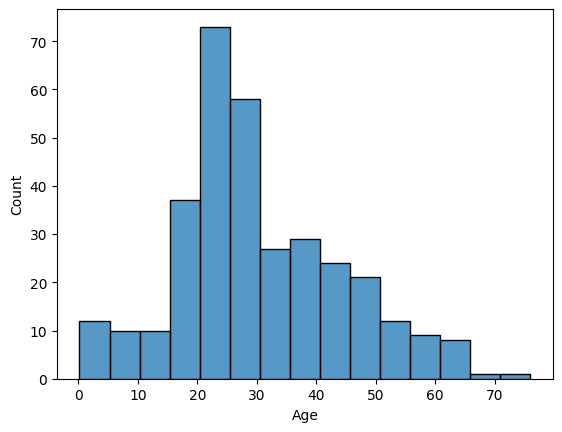

In [7]:
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

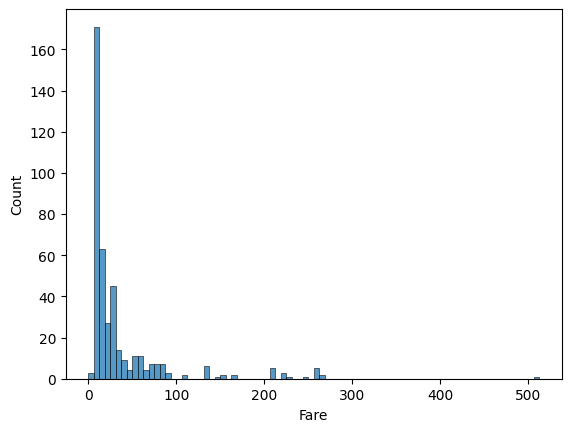

In [8]:
sns.histplot(x='Fare',data=df)

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

## Data Visualization / EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

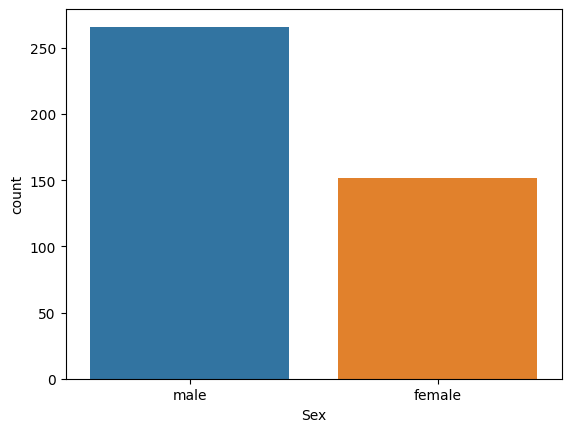

In [10]:
sns.countplot(x='Sex',data=df)

We can see that in ther is more male than female in titanic

<AxesSubplot:xlabel='Pclass', ylabel='count'>

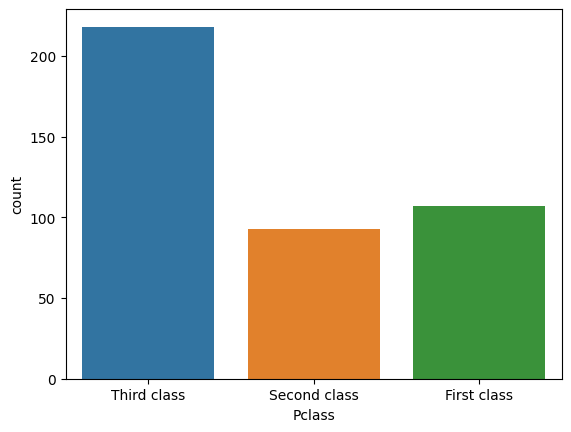

In [11]:
sns.countplot(x=df['Pclass'].map( {1:'First class', 2:'Second class' , 3: 'Third class'}))

Most of the people in titanic ship are third class

<AxesSubplot:xlabel='Survived', ylabel='count'>

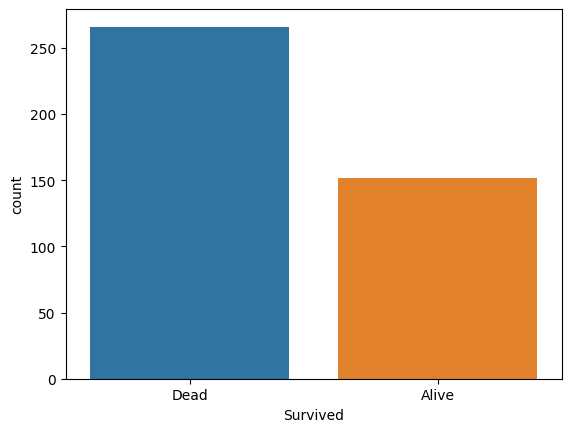

In [12]:
sns.countplot(x=df['Survived'].map( {0:'Dead',1:'Alive'}))

This shows that most people likely to not survived

<AxesSubplot:xlabel='SibSp', ylabel='count'>

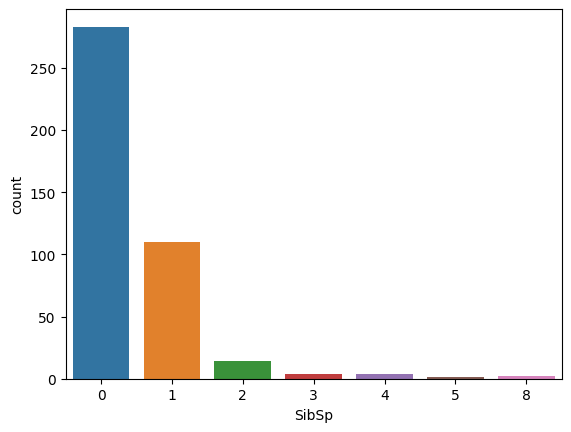

In [13]:
sns.countplot(x='SibSp',data =df )

This graph show that most of the people not have any siblings and they likely only have one sibling.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

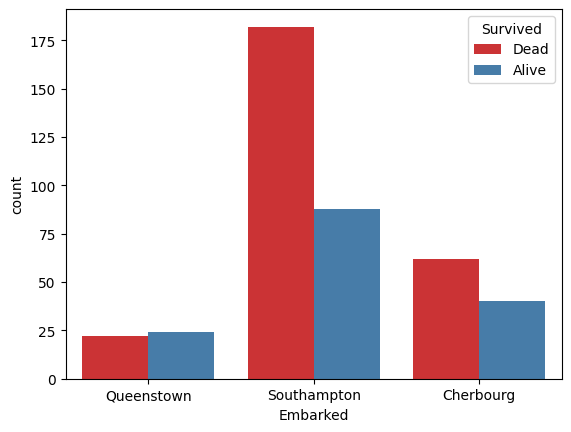

In [14]:
suvived=df['Survived'].map( {0:'Dead',1:'Alive'})
embarked = df['Embarked'].map( {'C':'Cherbourg', 'Q':'Queenstown','S':'Southampton'})
sns.countplot( x=embarked, data=df, hue=suvived, palette="Set1")

This mean most of the people embarked from Southamthon and likeily to survived

<AxesSubplot:xlabel='Age', ylabel='Density'>

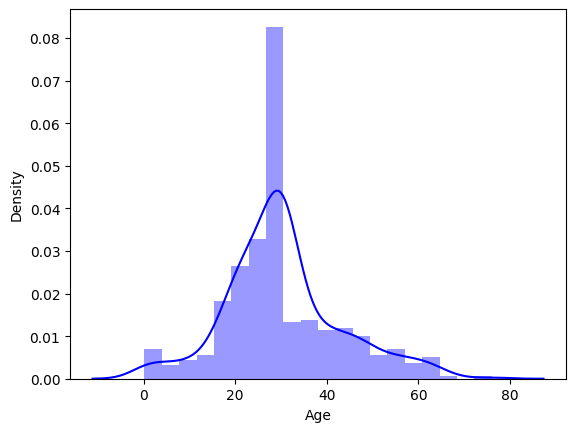

In [15]:
sns.distplot(df['Age'],color="b",bins=20,kde=True)

## Prepare data

In [16]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [19]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,0
1,1,3,1,47.00000,1,0,7.0000,1
2,0,2,0,62.00000,0,0,9.6875,0
3,0,3,0,27.00000,0,0,8.6625,1
4,1,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,1
414,1,1,1,39.00000,0,0,108.9000,2
415,0,3,0,38.50000,0,0,7.2500,1
416,0,3,0,30.27259,0,0,8.0500,1


Drop some columns that not useful

In [21]:
X = df.drop(['Survived'],axis=1) 
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=99)

### DecisionTreeClassifier

In [22]:

decision_tree = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1,25),
                  'min_samples_split': range(2,30),
                  'max_features': range(1,10)}
GS = GridSearchCV(estimator=decision_tree, param_grid=parameter_grid, cv=4, scoring='accuracy')
GS.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25),
                         'max_features': range(1, 10),
                         'min_samples_split': range(2, 30),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [23]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 2, 'min_samples_split': 25, 'splitter': 'random'}

Best Score: 1.0


In [24]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 1, max_features = 3, min_samples_split = 8, splitter = 'random')
decision_tree.fit(X_train, y_train)
Y_pred_dicision_tree = decision_tree.predict(X_test)
decision_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred_dicision_tree, y_test) * 100, 2)
print("Training Accuracy     :",decision_train)
print('Model Accuracy     :',decision_accuracy)

Training Accuracy     : 68.21
Model Accuracy     : 58.7


[Text(0.5, 1.0, 'DicisionTree prediction')]

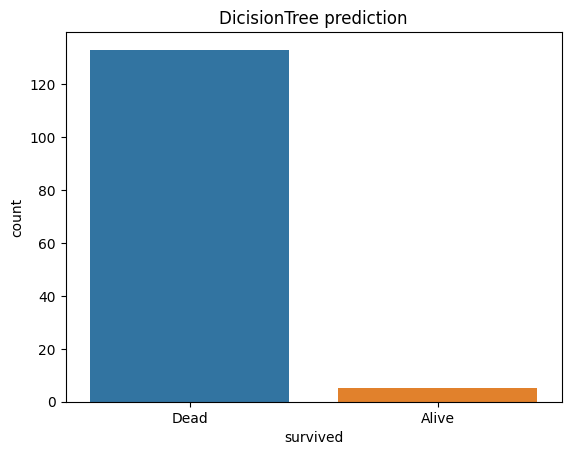

In [25]:
pred_dicision_tree_df = pd.DataFrame(Y_pred_dicision_tree,columns=['survived'])
sns.countplot(x= pred_dicision_tree_df['survived'].map({0:"Dead",1:'Alive'})).set(title='DicisionTree prediction')

### XGBClassifier

In [26]:
xgb_test = Xgb.XGBClassifier(learning_rat=0.1,n_estimators=140,subsample=0.6)
xgb_parameter = {
'max_depth':range(1,5),
'min_child_weight':range(1,6),
'gamma':[i/10.0 for i in range(0,5)]
 }
GS_xgb = GridSearchCV(estimator=xgb_test, param_grid=xgb_parameter, cv=5, scoring='roc_auc',n_jobs=4)
GS_xgb.fit(X_train, y_train)
print('Best Parameters:',GS_xgb.best_params_,end='\n\n')
print('Best Score:',GS_xgb.best_score_)

Best Parameters: {'gamma': 0.0, 'max_depth': 1, 'min_child_weight': 1}

Best Score: 1.0


In [27]:

xgb = Xgb.XGBClassifier(learning_rat=0.1, gamma=0,n_estimators=140,max_depth=1, min_child_weight= 1,subsample=0.6)
xgb.fit(X_train,y_train)
Y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy :",xgb_train)
print("Model Score  :",xgb_accuracy)

Training Accuracy : 100.0
Model Score  : 100.0


[Text(0.5, 1.0, 'Xgb prediction')]

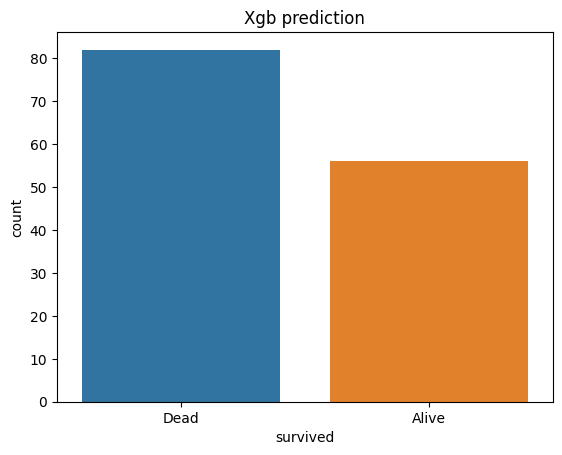

In [28]:
pred_xgb_df = pd.DataFrame(Y_pred_xgb,columns=['survived'])
sns.countplot(x= pred_xgb_df['survived'].map({0:"Dead",1:'Alive'})).set(title='Xgb prediction')

In conclusion, we can see that most of the people in the titanic will not survive